In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer


from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score,  precision_score, recall_score, balanced_accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Dataset Exploration
## a) Load the df_hackathon.csv dataset - (hint: use pandas)
Assign it to a variable called df.

In [ ]:
df = pd.read_csv('/content/df_hackathon.csv')

## b) Using pandas examine the numerical features of the dataset

Examine the 7+1 figure summary (count, mean, std, min, 1Q, median, 3Q, max)

- Αre there any missing feature values?
- Are there any unexpected (or extreme) feature values?

In [ ]:
print(df.describe())

               age  hours_per_week  magical_artifact_possession_score  \
count  5000.000000     4153.000000                        5000.000000   
mean     38.712600       40.500602                       49014.986600   
std      13.511392       12.301979                       25493.947692   
min      17.000000        1.000000                       -7762.000000   
25%      28.000000       40.000000                       29014.000000   
50%      37.000000       40.000000                       50128.000000   
75%      48.000000       45.000000                       70045.750000   
max      90.000000       99.000000                       98653.000000   

       magical_artifact_power_level  number_of_spells_mastered  
count                   5000.000000                5000.000000  
mean                   61779.650480                -113.590000  
std                    20969.557492                1169.637023  
min                    10825.600000              -10000.000000  
25%              

In [ ]:
print(df.isnull().sum())

age                                    0
education                              0
marital_status                         0
occupation                             0
bloodline                              0
gender                                 0
hours_per_week                       847
income_bracket                         0
magical_artifact_possession_score      0
magical_artifact_power_level           0
number_of_spells_mastered              0
gringotts_approved_loan                0
dtype: int64


In [ ]:
def find_or_sum_outliers(df, how='sum'):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if not outliers.empty:
            if how == 'find':
                print(f"Outliers in {column}:")
                print(outliers)
                print()
            elif how == 'sum':
                print(f"Sum of outliers in {column}: {outliers.sum()}")
                print()


find_or_sum_outliers(df, how='find') #use find or sum in the 2nd argument

Outliers in age:
124     81
182     81
226     79
299     88
309     81
551     87
730     90
765     90
975     79
1206    81
1222    79
1412    85
2101    82
2233    80
2285    87
2493    83
2539    79
3069    80
3537    90
3613    90
4077    88
4190    83
Name: age, dtype: int64

Outliers in hours_per_week:
7       12.0
21      60.0
35      30.0
37      16.0
43      65.0
        ... 
4985    26.0
4987    30.0
4994    65.0
4996    55.0
4998    30.0
Name: hours_per_week, Length: 1184, dtype: float64

Outliers in number_of_spells_mastered:
75         45
147    -10000
164    -10000
290        45
308        45
        ...  
4859       45
4867       45
4916   -10000
4926       45
4929   -10000
Name: number_of_spells_mastered, Length: 153, dtype: int64



Visualise in histograms the numerical features.

- Is there significant data skewness in any of the variables?

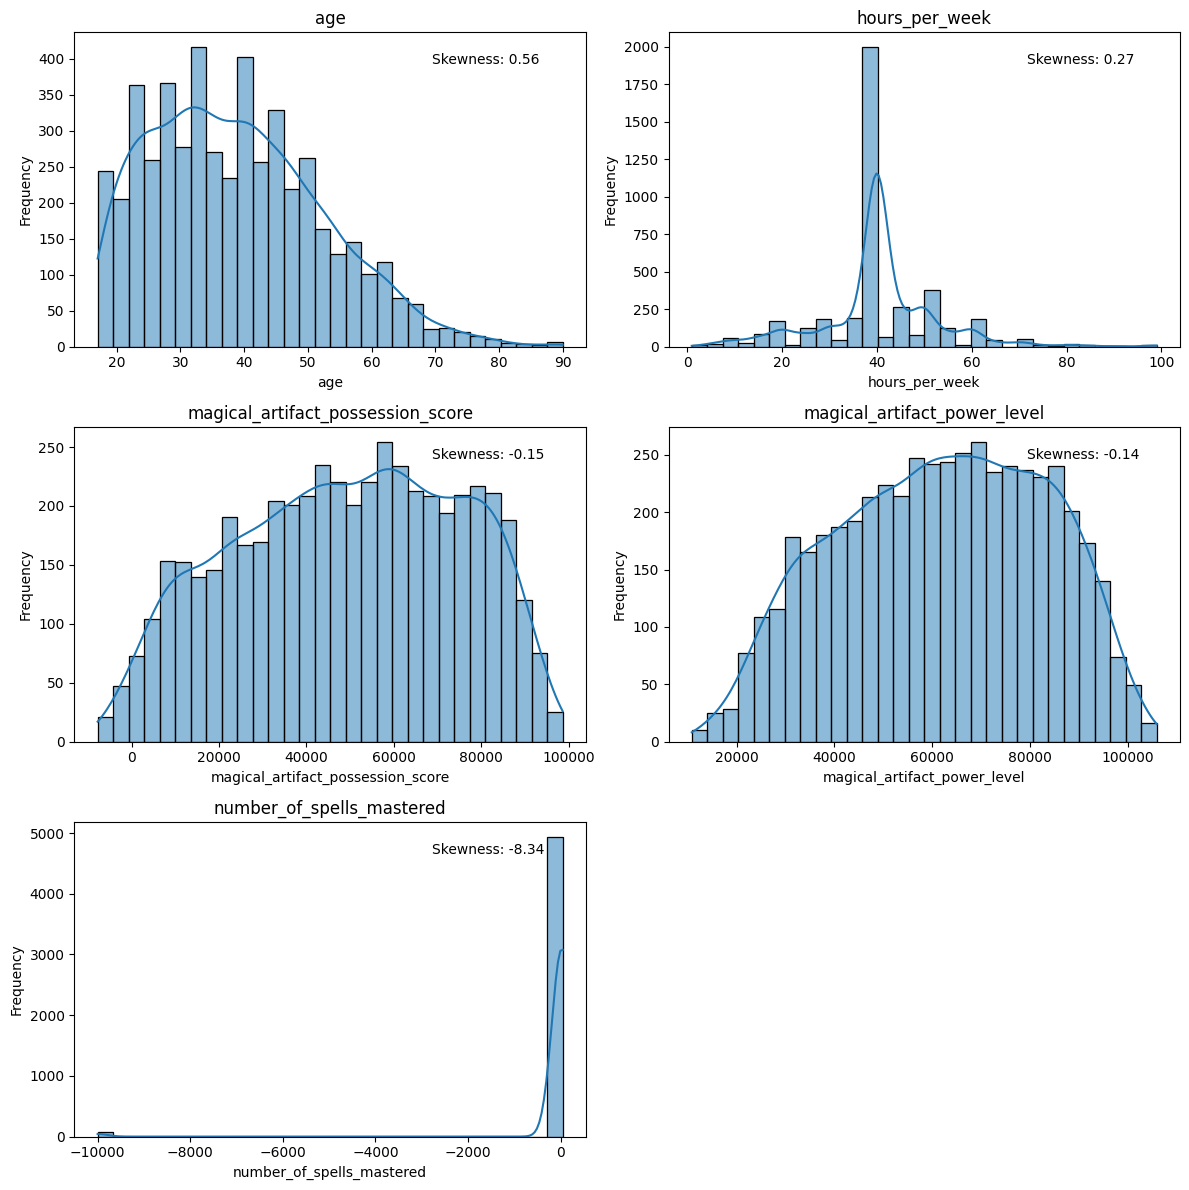

In [ ]:

def plot_histograms_and_skewness(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numerical_columns)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols

    plt.figure(figsize=(12, 4 * num_rows))

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        skewness = df[column].skew()
        plt.annotate(f'Skewness: {skewness:.2f}', xy=(0.7, 0.9), xycoords='axes fraction')

    plt.tight_layout()
    plt.show()

plot_histograms_and_skewness(df)

## c) Using pandas examine the categorical features of the dataset

- Are there any significant inequalities in the dataset?
- Are there any features with missing values?

In [ ]:
# Load the dataset
df = pd.read_csv('/content/df_hackathon.csv')

# Examine the categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Features Analysis:")
print("--------------------------------")

for column in categorical_columns:
    print(f"Feature: {column}")
    print(df[column].value_counts(normalize=True))  # Display the distribution of values
    print(f"Missing values: {df[column].isnull().sum()}")  # Check for missing values
    print()

# Check for significant inequalities
print("Significant Inequalities:")
print("--------------------------")
for column in categorical_columns:
    value_counts = df[column].value_counts(normalize=True)
    if value_counts.iloc[0] > 0.7:  # Adjust the threshold as needed
        print(f"Feature '{column}' has a dominant category: {value_counts.index[0]} with {value_counts.iloc[0] * 100:.2f}% of values")

# Check for features with missing values
print("\nFeatures with Missing Values:")
print("------------------------------")
for column in categorical_columns:
    if df[column].isnull().sum() > 0:
        print(f"Feature '{column}' has {df[column].isnull().sum()} missing values")


Categorical Features Analysis:
--------------------------------
Feature: education
education
Specialism in a magical field    0.3826
Hogwarts Graduate                0.3520
Aurors Specialism                0.1728
Dropout                          0.0724
Charms Scholar                   0.0202
Name: proportion, dtype: float64
Missing values: 0

Feature: marital_status
marital_status
Married          0.4750
Never-married    0.3272
Divorced         0.1350
Separated        0.0328
Widowed          0.0300
Name: proportion, dtype: float64
Missing values: 0

Feature: occupation
occupation
Hogwarts Professor                0.1482
Other                             0.1364
Magical Shop Owner                0.1240
Potioneer                         0.1066
Wandmaker                         0.0654
Gringotts Bank                    0.0612
Magical Transportation            0.0582
Auror                             0.0558
Ministry of Magic Official        0.0528
Wandlore Assistant                0.0346
Pot

## d) further dataset exploration
Using the facets library visualise the dataset (use code below). Try different combinations. Do you notice any patterns in the dataset that might influence the model's predictions?

In [ ]:
from IPython.core.display import display, HTML

vis_df = df.to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=vis_df)
display(HTML(html))

# 2. Feature Engineering

## a) Create a correlogram (hint: use pandas corr() function) and visualise it

- Are there any very strong correlations (numerical features)? if yes, remove one of the features.
- Explain how strong correlations can have an impact on some ML models.

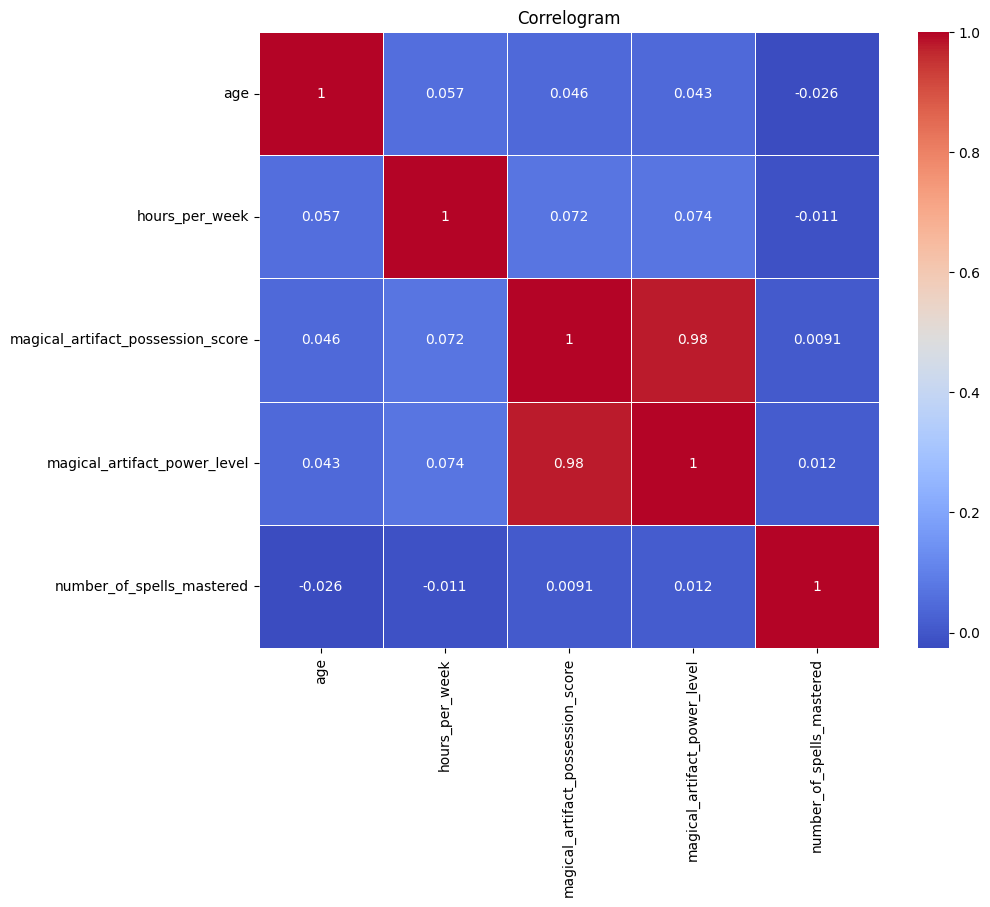

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlogram')
plt.show()

## b) Deal with extreme outliers

Reflect your answer on 1b). Did you identify any features with extreme outliers?

If yes, explain the nature of these outliers and deal with them appropriately.
- How many are there (in proportion to the whole dataset)?
- would dropping these rows lead to considerable data loss?

Try to also think what could result in the data collection process that resulted in them.

In [ ]:
'''age: There are 22 outliers, with ages ranging from 79 to 90. These values seem reasonable for a person's age, so they may not necessarily be considered extreme outliers. The proportion of these outliers is 22 / 5000 = 0.44% of the dataset.

hours_per_week: There are 1184 outliers, with hours per week ranging from 12 to 65. While 65 hours per week is high, it's not uncommon. The lower values like 12 or 16 hours per week could be part-time workers. The proportion of these outliers is 1184 / 5000 = 23.68% of the dataset.

number_of_spells_mastered: There are 153 outliers, with values ranging from -10000 to 45. The value of 45 is the maximum and could be considered a potential outlier, but the -10000 values are clearly errors and should be addressed. The proportion of these outliers is 153 / 5000 = 3.06% of the dataset.'''

outlier_age = df[(df['age'] < df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))) | (df['age'] > df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)))]
outlier_hours_per_week = df[(df['hours_per_week'] < df['hours_per_week'].quantile(0.25) - 1.5 * (df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25))) | (df['hours_per_week'] > df['hours_per_week'].quantile(0.75) + 1.5 * (df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)))]
outlier_spells_mastered = df[df['number_of_spells_mastered'] < 0]  # Assuming negative values are errors

print(f"Proportion of outliers in 'age': {len(outlier_age) / len(df) * 100:.2f}%")
print(f"Proportion of outliers in 'hours_per_week': {len(outlier_hours_per_week) / len(df) * 100:.2f}%")
print(f"Proportion of outliers in 'number_of_spells_mastered': {len(outlier_spells_mastered) / len(df) * 100:.2f}%")


Proportion of outliers in 'age': 0.44%
Proportion of outliers in 'hours_per_week': 23.68%
Proportion of outliers in 'number_of_spells_mastered': 1.38%


## c) Deal with features with missing values

Start by splitting your into training (X_train, y_train) and testing sets (X_test, y_test) in an 80-20 split (hint: use train_test_split from sklearn). Use random_state = 42.

Reflect again on exercise 2c. Did you identify any numerical features with missing values?

- Impute the values in the feature with the missing values using the numerical features.
- Check (e.g. by plotting) the distribution of the feature with the missing values before and after imputation. Ensure that the imputation did not bias/skew the feature's distribution.

Just as a reminder, the dependent variable (y) is gringotts_approved_loan.

`Tip:` It is essential to train the imputation model only on the training data to avoid [data leakage](https://machinelearningmastery.com/data-preparation-without-data-leakage/). Then use the trained imputation model to also predict the most appropriate value for the testing data. Please feel free to use the impute_missing_values function.





Save the imputed dfs as `X_train_imputed` and `X_test_imputed`.



In [ ]:
X = df.drop(columns=['gringotts_approved_loan'])
y = df['gringotts_approved_loan']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def impute_missing_values(feature_with_missing, X_train, X_test):
    # One-hot encode categorical features.
    X_train_encoded = pd.get_dummies(X_train)
    X_test_encoded = pd.get_dummies(X_test)

    X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

    # Impute using KNN imputer (model-based approach). Importantly, we are only fitting
    # the imputer on the training data.
    knn_imputer_full = KNNImputer(n_neighbors=5)
    X_train_imputed = knn_imputer_full.fit_transform(X_train_encoded)
    X_test_imputed = knn_imputer_full.transform(X_test_encoded)

    # Convert back to pandas DataFrame, ensuring column names are retained.
    X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns, index=X_train_encoded.index)
    X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_encoded.columns, index=X_test_encoded.index)

    # Replace the imputed column to the original X_train and X_test passed in.
    X_train[feature_with_missing] = X_train_imputed[feature_with_missing]
    X_test[feature_with_missing] = X_test_imputed[feature_with_missing]

    return X_train, X_test

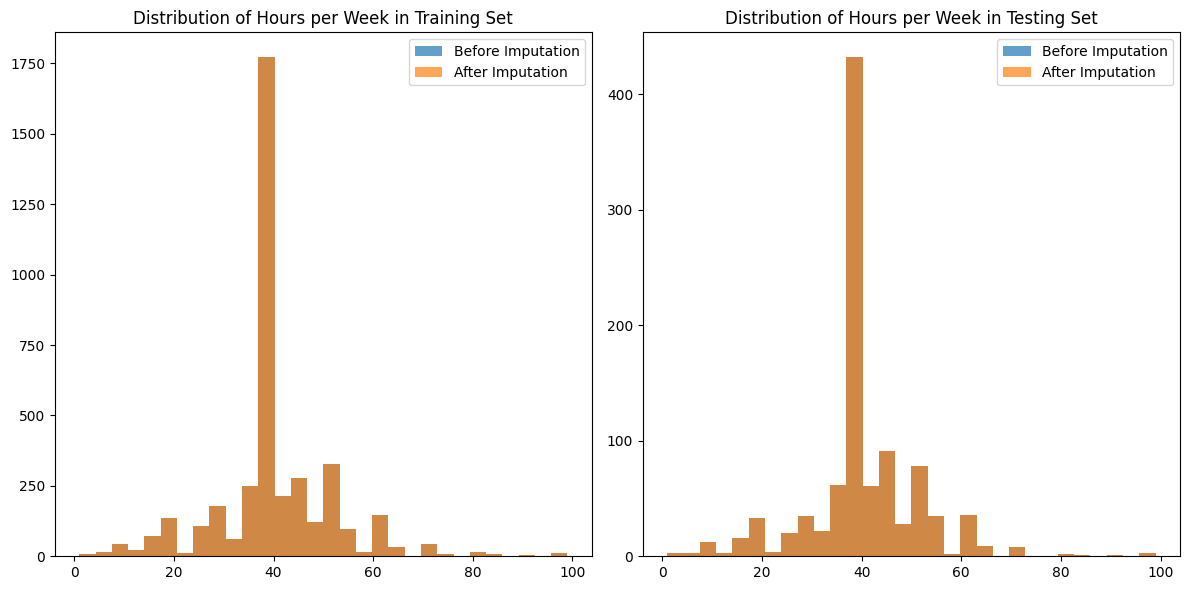

In [ ]:
X_train_imputed, X_test_imputed = impute_missing_values('hours_per_week', X_train, X_test)

# Check the distribution before and after imputation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train['hours_per_week'].dropna(), bins=30, alpha=0.7, label='Before Imputation')
plt.hist(X_train_imputed['hours_per_week'], bins=30, alpha=0.7, label='After Imputation')
plt.title('Distribution of Hours per Week in Training Set')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(X_test['hours_per_week'].dropna(), bins=30, alpha=0.7, label='Before Imputation')
plt.hist(X_test_imputed['hours_per_week'], bins=30, alpha=0.7, label='After Imputation')
plt.title('Distribution of Hours per Week in Testing Set')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Train RF model

Train a [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model and evaluate its performance on 10-fold CV and also on the test set. You might find sklearn [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) helpful to create the model (`tip`: use OneHotEncoder to encode the cateogrical features)

Evaluate the performance using accuracy_score and classification_report from sklearn. Comment on the model's performance considering precision and recall. Comment on the generalisability of the model (does it have similar performance on the test set as with the cross validation set?)

Use `X_train_imputed`, `y_train`, `X_test_imputed`, `y_test`.

In [ ]:
# Identify categorical and numerical features
categorical_features = X_train_imputed.select_dtypes(include=['object']).columns
numerical_features = X_train_imputed.select_dtypes(exclude=['object']).columns

# Create a preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Create the Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model using 10-fold cross-validation
cv_scores = cross_val_score(rf_pipeline, X_train_imputed, y_train, cv=10)
print(f"10-fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train the model on the entire training set and evaluate on the test set
rf_pipeline.fit(X_train_imputed, y_train)
y_pred = rf_pipeline.predict(X_test_imputed)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

10-fold CV Accuracy: 0.8485 ± 0.0148
Test set accuracy: 0.8450

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.88      0.87       583
         Yes       0.83      0.80      0.81       417

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



# 5. Evaluate feature importance
Identify and visualise the top 10 most important features that influence when Gringotts approves a loan.

Comment on the impact of the top few features.

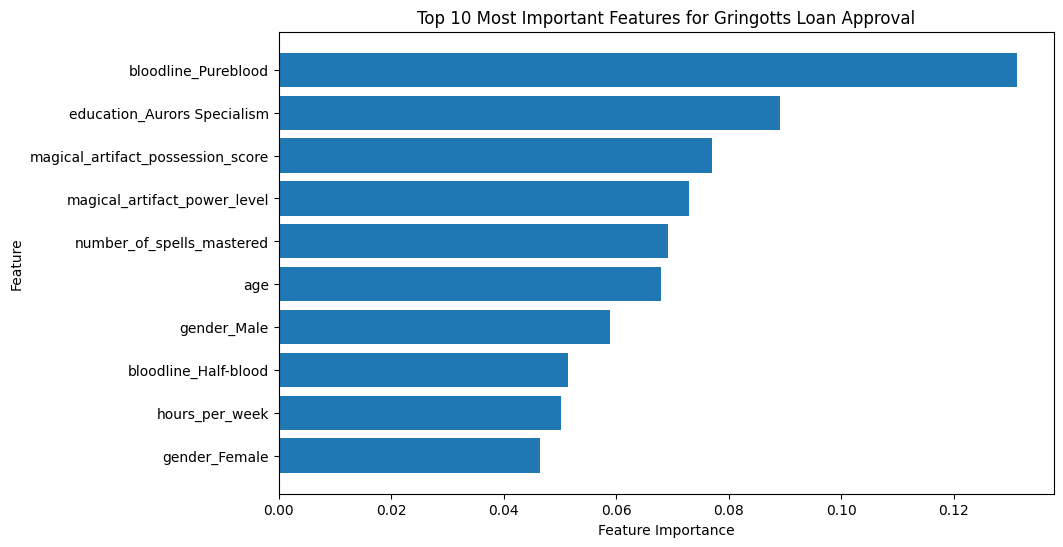

In [ ]:
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get the feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([feature_names, numerical_features])

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
top_10_idx = sorted_idx[:10]
top_10_features = feature_names[top_10_idx]
top_10_importances = feature_importances[top_10_idx]

# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features[::-1], top_10_importances[::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Gringotts Loan Approval')
plt.show()

# 6. Understanding model's performance further

In [ ]:
!pip install matplotlib
!pip install fairlearn
from fairlearn.metrics import MetricFrame, selection_rate

Determine if the model exhibits bias by performing significantly differently across various groups. For instance, assess whether the model's performance is superior or inferior for samples where the gender is male compared to other groups.

Use the get_fairness_evaluation function to analyze the impact of this and other variables on model performance. This function uses Fairlearn to evaluate how the model fares across different classes, focusing on sensitive metrics such as accuracy, balanced accuracy, precision, and recall.

In [ ]:
def get_fairness_evaluation(X_test, y_test, y_pred, columns):
  sensitive_features_df = X_test[columns]

  def precision_wrapper(y_true, y_pred): return precision_score(y_true, y_pred, pos_label='Yes', zero_division=0)
  def recall_wrapper(y_true, y_pred): return recall_score(y_true, y_pred, pos_label='Yes', zero_division=0)

  mf = MetricFrame(metrics={
                      'accuracy': accuracy_score,
                      'balanced_accuracy': balanced_accuracy_score,
                      'precision': precision_wrapper,
                      'recall': recall_wrapper,
                      'count': lambda y_true, y_pred: y_true.shape[0]},
                  y_true=y_test,
                  y_pred=y_pred,
                  sensitive_features=sensitive_features_df)

  plot = mf.by_group.plot.bar(
    subplots=True,
    legend=True,
    figsize=[12, 8],
    title="Fairness Metrics Across Sensitive Features"
  )

  plt.tight_layout()
  plt.show()

  return mf.by_group

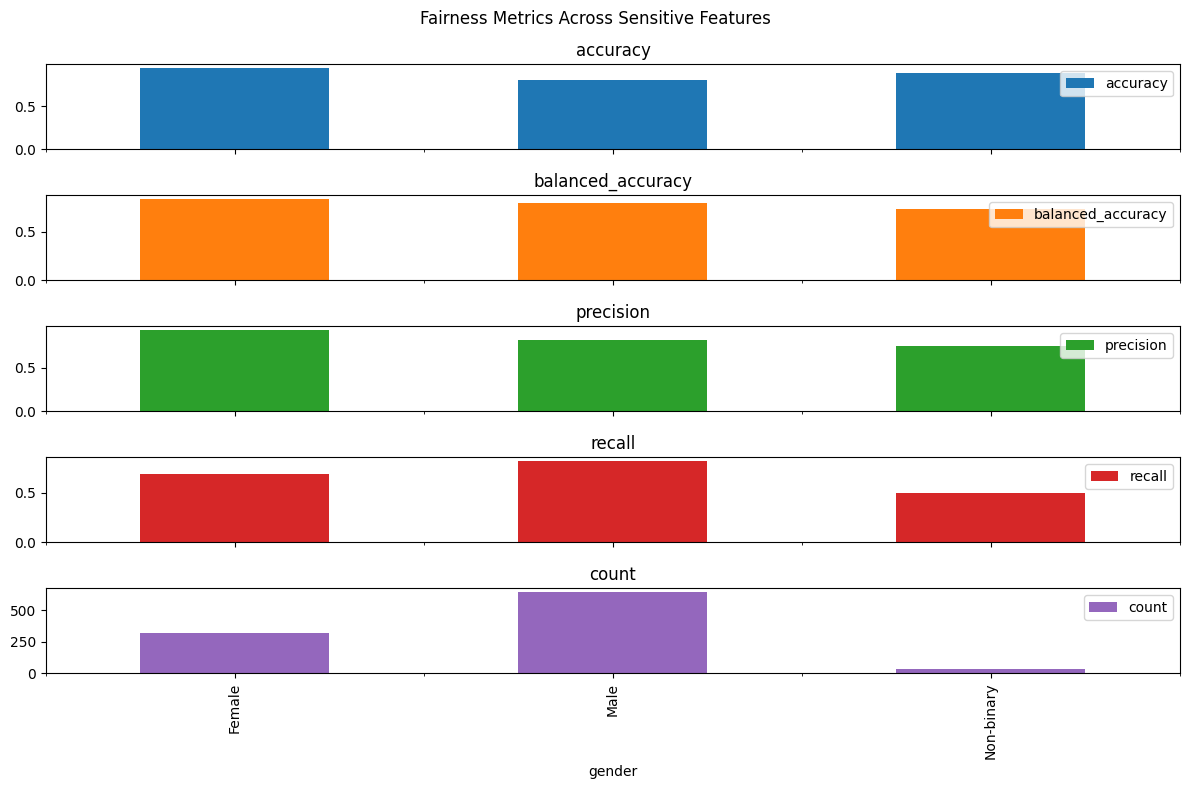

,accuracy,balanced_accuracy,precision,recall,count
gender,,,,,
Female,0.934375,0.836402,0.928571,0.684211,320.0
Male,0.798762,0.796591,0.814607,0.819209,646.0
Non-binary,0.882353,0.732143,0.750000,0.500000,34.0


In [ ]:
get_fairness_evaluation(X_test_imputed, y_test, y_pred, ['gender'])

Try out different combinations. For example you can pass as input to the columns feature ['bloodline', gender'].

# Sociotechnical questions

Reflection questions: As part of the assessment of this bounty you will also be graded on how you reflect on the following questions. When practicing AI Ethics, it is important to understand AI as socio-technical systems, and that although technical issues can be problematic, one need to understand the systematic and social structures giving rise to them in the first place.

- Can all problems with bias be solved technically? If not, why?
- What decision-making systems should be using algorithmic/AI approaches and which should not?
- Is it just and fair to solve problems with bias by fixing technological constraints?

In [ ]:
'''
Can all problems with bias be solved technically? If not, why?

Not all problems with bias can be solved technically. Bias often stems from systemic and social structures that predate and underpin the development and deployment of AI systems. Technical solutions can mitigate some manifestations of bias in AI models, but they cannot address the root causes of bias, which are often deeply embedded in societal norms, practices, and institutions. Addressing bias comprehensively requires a combination of technical, social, and policy interventions.
What decision-making systems should be using algorithmic/AI approaches and which should not?

The use of algorithmic/AI approaches in decision-making systems should be guided by considerations of fairness, transparency, accountability, and the potential impact on individuals and communities. AI should be used when it can improve efficiency, accuracy, and objectivity, and when adequate safeguards are in place to mitigate risks and unintended consequences. It may be inappropriate to use AI in contexts where decisions have significant ethical implications, where there is a high risk of harm, or where the complexity of human judgment cannot be adequately captured by algorithms.
Is it just and fair to solve problems with bias by fixing technological constraints?

Fixing technological constraints is a necessary but not sufficient step towards addressing bias. While improving the fairness and accuracy of AI models is important, it does not address the broader societal issues that give rise to bias. A just and fair approach to solving problems with bias requires a holistic perspective that considers the social, economic, and political dimensions of bias. This includes engaging with affected communities, promoting diversity and inclusion in the development of AI, and ensuring that AI systems are aligned with ethical principles and human rights.
Overall, addressing bias in AI is a complex challenge that requires a multifaceted approach, combining technical solutions with broader societal efforts to promote equity and justice.

'''

'\nCan all problems with bias be solved technically? If not, why?\n\nNot all problems with bias can be solved technically. Bias often stems from systemic and social structures that predate and underpin the development and deployment of AI systems. Technical solutions can mitigate some manifestations of bias in AI models, but they cannot address the root causes of bias, which are often deeply embedded in societal norms, practices, and institutions. Addressing bias comprehensively requires a combination of technical, social, and policy interventions.\nWhat decision-making systems should be using algorithmic/AI approaches and which should not?\n\nThe use of algorithmic/AI approaches in decision-making systems should be guided by considerations of fairness, transparency, accountability, and the potential impact on individuals and communities. AI should be used when it can improve efficiency, accuracy, and objectivity, and when adequate safeguards are in place to mitigate risks and unintend